# Segmentation
## Character Prototypes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

DATA_DIR = "../../data/dss/"
TRAIN_DATA_DIR = DATA_DIR + "monkbrill/"

In [2]:
letters = list(filter(lambda x: os.path.isdir(TRAIN_DATA_DIR + x), os.listdir(TRAIN_DATA_DIR)))
n_letters = len(letters)

imgs = []
for letter in letters:
  root = f"{TRAIN_DATA_DIR}{letter}/"
  imgs.append([cv.threshold(cv.imread(root + file, 0), 127, 255, cv.THRESH_BINARY_INV)[1] for file in os.listdir(root)])
  # imgs = [cv.imread(root + file, 0) for file in files]

[46.37666667 37.28666667]
[10.6774586   4.37391764]
[[42 35]
 [42 35]
 [50 32]
 [62 34]
 [61 37]]


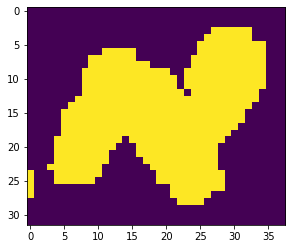

In [3]:
lst = []

for img in imgs[0]:
  lst.append(list(np.shape(img)))
  
print(np.mean(lst, axis=0))
print(np.std(lst, axis=0))

print(np.array(lst)[:5])
# print(np.array(imgs)[:5])

plt.imshow(imgs[0][220])
plt.show()

In [4]:
sample_dict = dict(zip(letters, imgs))

heights = list()
widths = list()
for letter in letters:
  for img in sample_dict[letter]:
    # print(np.shape(img))
    heights.append(np.shape(img)[0])
    widths.append(np.shape(img)[1])

avgh = np.mean(heights)
avgw = np.mean(widths)

print(f"average size: {(avgh, avgw)}")

cropped_data = dict(zip(letters, [[] for _ in range(n_letters)]))
print(cropped_data)

for letter in letters:
  for i, img in enumerate(sample_dict[letter]):
    h, w = img.shape
    # Largest distance index
    ldi = np.argmax([avgh - h, avgw - w])
    # Resize proportion
    res_prop = [avgh / h, avgw / w][ldi]
    scaledh, scaledw = int(h * res_prop), int(w * res_prop)
    # print(f"original: {(h, w)}\tprop:{res_prop}")
    # print(f"scaled: {(scaledh, scaledw)}\navg: {(avgh, avgw)}")
    scaled = cv.resize(img, (scaledw, scaledh), interpolation=cv.INTER_CUBIC)  # BI_CUBIC or INTER_CUBIC
    # print(f"scaled size: {scaled.shape}")
    
    cy, cx = int(scaledh / 2), int(scaledw / 2)
    pady, padx = int(avgh / 2), int(avgw / 2)
    l, r = cx - padx, cx + padx
    t, b = cy - pady, cy + pady
    cropped = scaled[t:b, l:r]
    print(len(cropped))
    if all([x > 3 for x in np.shape(cropped)]):
      cropped_data[letter].append(cropped)

average size: (47.579013906447535, 37.73451327433628)
{'Alef': [], 'Ayin': [], 'Bet': [], 'Dalet': [], 'Gimel': [], 'He': [], 'Het': [], 'Kaf': [], 'Kaf-final': [], 'Lamed': [], 'Mem': [], 'Mem-medial': [], 'Nun-final': [], 'Nun-medial': [], 'Pe': [], 'Pe-final': [], 'Qof': [], 'Resh': [], 'Samekh': [], 'Shin': [], 'Taw': [], 'Tet': [], 'Tsadi-final': [], 'Tsadi-medial': [], 'Waw': [], 'Yod': [], 'Zayin': []}
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
1
46
46
46
46
46


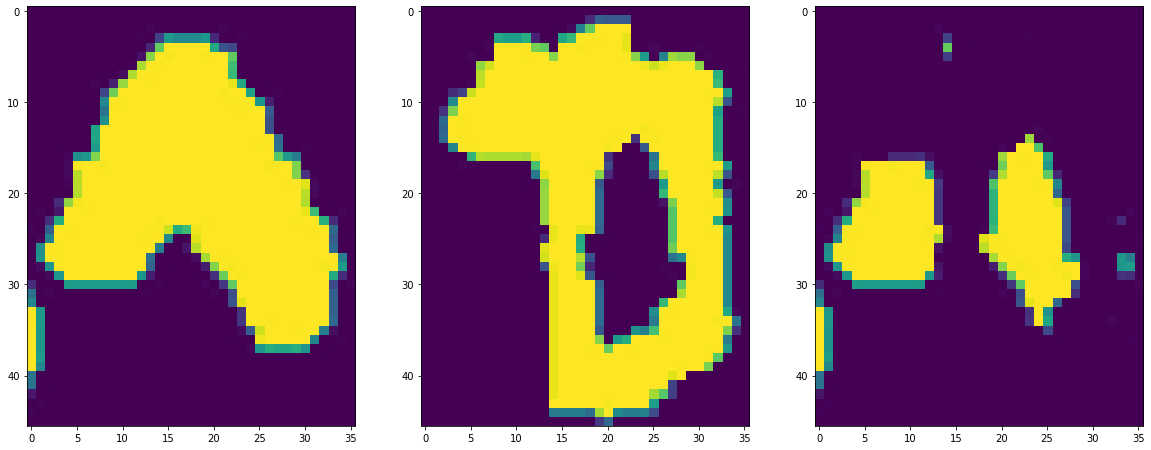

In [12]:
im1 = cropped_data['Yod'][0]
im2 = cropped_data['Mem'][2]
fig, axes = plt.subplots(1, 3, figsize=(20, 60))
axes[0].imshow(im1)
axes[1].imshow(im2)
axes[2].imshow(cv.subtract(im1, im2))

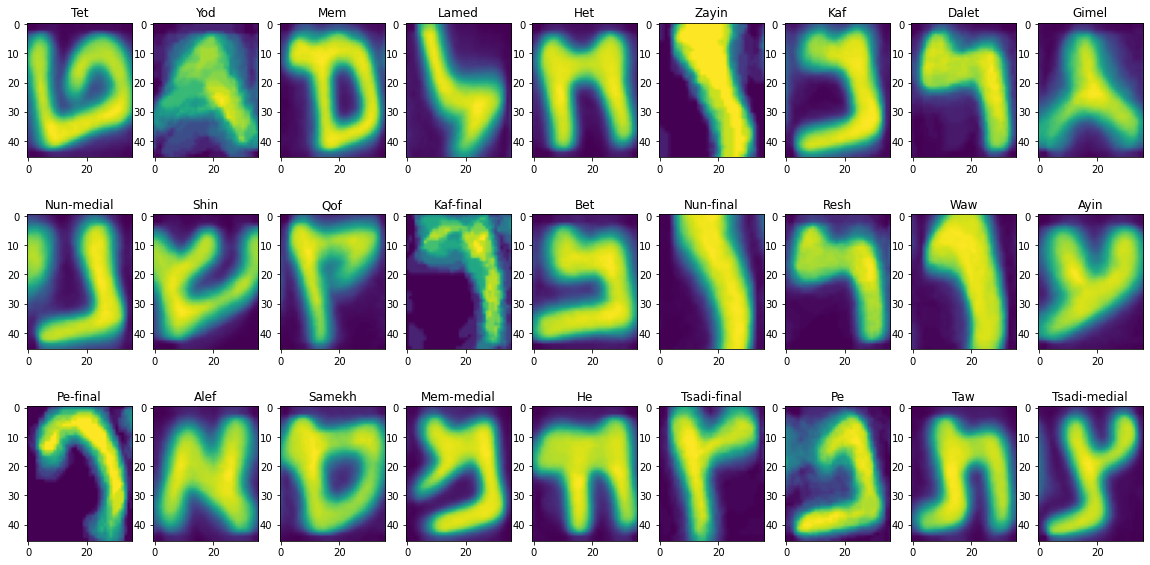

27


In [158]:
# print([x for x in enumerate(cropped_data[letters[0]]) if np.shape(x[1])[0] == 1][0])
plt.show()

fig, axes = plt.subplots(3, 9, figsize=(20, 10))
for ax, (letter, samples) in zip(np.concatenate(axes), cropped_data.items()):
  ax.imshow(np.mean(samples, axis=0))
  ax.set_title(letter)
plt.show()
print(n_letters)